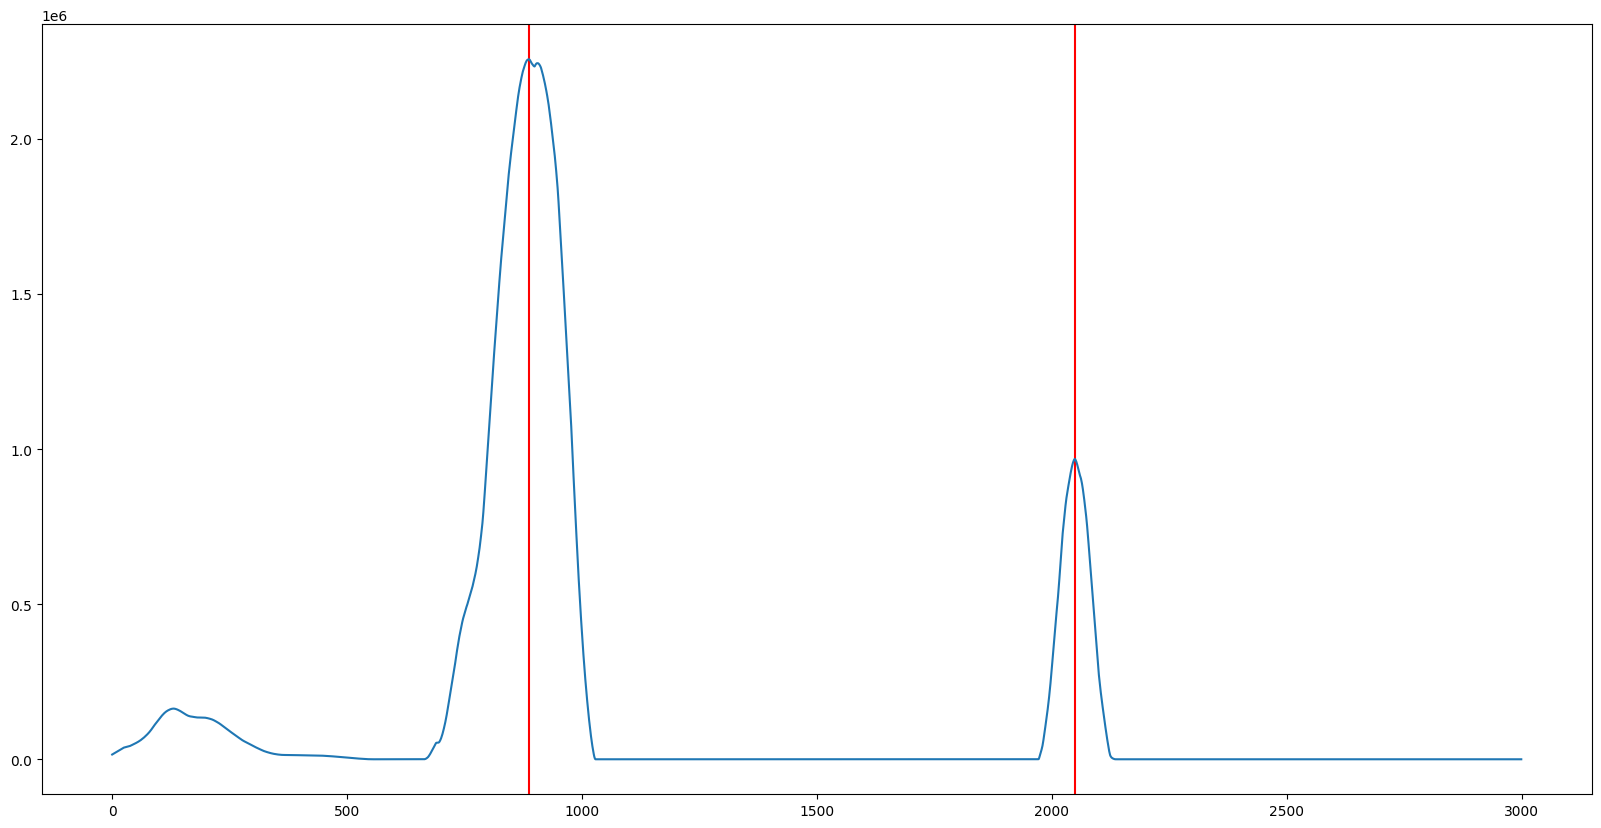

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

plt.rc(
    'figure',
    figsize=(20, 10)
)

img = cv2.imread('frame_wrapped.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

columns_summed = np.sum(th1, axis=0)
window_size = 50
moving_average = np.convolve(columns_summed, np.ones(window_size)/window_size, mode='same')

peaks, _ = find_peaks(moving_average, height=0.2e6, distance=100, width=10)
for peak in peaks:
    plt.axvline(peak, color='r')

plt.plot(moving_average)

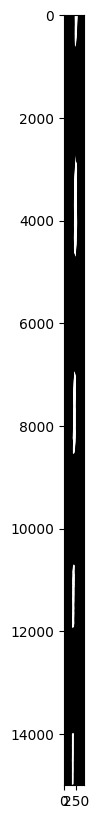

In [108]:
peak = peaks[1]
x_start = peak - 200
x_end = peak + 200

data = th1[:, x_start:x_end]

plt.imshow(data, cmap='gray')

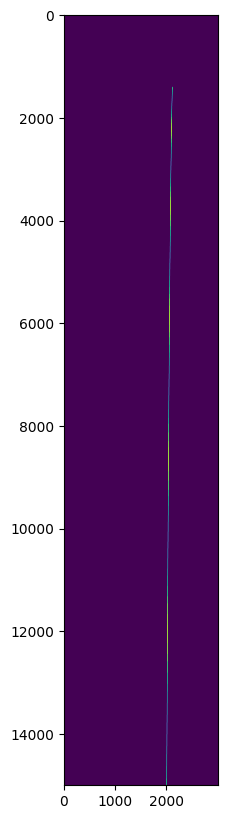

In [126]:
x, y = np.nonzero(data.T)

x_values = np.linspace(min(x), max(x), 100)
y_values = np.polyval(np.polyfit(x, y, 2), x_values)

points = np.column_stack((x_values, y_values)).astype(np.int32) + [x_start, 0]

empty = np.zeros_like(gray)
cv2.polylines(empty, [points], isClosed=False, color=255, thickness=10)

plt.imshow(empty)
